In [78]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

In [79]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/d35_vs_d60/'
os.listdir(working_dir)

['example_roi_Artifacts.pdf',
 'example_roi_Adjacent.pdf',
 'feature_correlation_graph.html',
 'volcano_d35_d60.pdf',
 'average_profile_TBR1-LowDN.pdf',
 'average_profile_TBR1-HighDN.pdf',
 'example_roi_Surface.pdf',
 'clustermap_d35_d60_hits.pdf',
 'Lancaster_d60',
 'example_roi_DN.pdf',
 'cyto_profiles_combined.npy',
 'feature_correlation_graph_0_6.html',
 'average_profile_DN.pdf',
 'feature_correlation_graph_0_7.html',
 'feature_correlation_graph_0_8.html',
 'analysis.csv',
 'cyto_clusters_umap.pdf',
 'average_profile_Artifacts.pdf',
 'model_d35_d60.umap',
 'average_profile_Surface.pdf',
 'clustermap.pdf',
 'Lancaster_d35',
 'feature_edge_ranks.xlsx',
 'example_roi_TBR1-HighDN.pdf',
 'cyto_profiles_combined_samples.npy',
 'example_roi_TBR1-LowDN.pdf',
 'feature_edge_rank.xlsx',
 'd35_vs_d60_withFC.xlsx',
 'feature_correlation_graph_0_75.html',
 'cyto_labels_combined.npy',
 'clustermap_d35_d60.pdf',
 'example.html',
 'average_profile_Adjacent.pdf',
 'clustered_correlation_table.xlsx'

In [80]:
df = pd.read_excel(os.path.join(working_dir, 'combined_features.xlsx'), index_col=0)
# df = df.set_index('feature')
df.columns = [f'd35_{i}' for i in range(12)] + [f'd60_{i}' for i in range(8)]
df.head()

,d35_0,d35_1,d35_2,d35_3,d35_4,d35_5,d35_6,d35_7,d35_8,d35_9,d35_10,d35_11,d60_0,d60_1,d60_2,d60_3,d60_4,d60_5,d60_6,d60_7
dataset,,,,,,,,,,,,,,,,,,,,
"DN nbrhd, sox2 count",14.0,9.0,34.0,19.0,12.0,13.0,26.0,18.0,5.0,28.0,92.0,19.0,23.0,5.0,15.0,13.0,14.0,25.0,22.0,9.0
"DN nbrhd, tbr1 count",15.0,10.0,11.0,7.0,9.0,10.0,12.0,8.0,0.0,5.0,7.0,9.0,14.0,2.0,7.0,12.0,10.0,12.0,3.0,2.0
"DN nbrhd, dn count",84735.0,3836.0,21985.0,5449.0,80307.0,9378.0,110050.0,158549.0,105539.0,15146.0,7826.0,9528.0,1254368.0,143520.0,646200.0,1873618.0,545173.0,1383294.0,1560760.0,521993.0
"SOX2 nbrhd, sox2 count",550868.0,362686.0,471401.0,494048.0,833321.0,218660.0,634230.0,707343.0,462029.0,134363.0,350636.0,85757.0,1063540.0,303410.0,543163.0,1169848.0,836021.0,969815.0,997507.0,718123.0
"SOX2 nbrhd, tbr1 count",1296.0,435.0,1003.0,672.0,2094.0,838.0,2572.0,1652.0,1256.0,498.0,1715.0,686.0,750.0,517.0,250.0,395.0,418.0,455.0,550.0,330.0


In [81]:
column_headers = list(df.keys())
d35_headers = [h for h in column_headers if 'd35' in h]
d60_headers = [h for h in column_headers if 'd60' in h]

df35 = df[d35_headers]
df60 = df[d60_headers]

df35.head()

,d35_0,d35_1,d35_2,d35_3,d35_4,d35_5,d35_6,d35_7,d35_8,d35_9,d35_10,d35_11
dataset,,,,,,,,,,,,
"DN nbrhd, sox2 count",14.0,9.0,34.0,19.0,12.0,13.0,26.0,18.0,5.0,28.0,92.0,19.0
"DN nbrhd, tbr1 count",15.0,10.0,11.0,7.0,9.0,10.0,12.0,8.0,0.0,5.0,7.0,9.0
"DN nbrhd, dn count",84735.0,3836.0,21985.0,5449.0,80307.0,9378.0,110050.0,158549.0,105539.0,15146.0,7826.0,9528.0
"SOX2 nbrhd, sox2 count",550868.0,362686.0,471401.0,494048.0,833321.0,218660.0,634230.0,707343.0,462029.0,134363.0,350636.0,85757.0
"SOX2 nbrhd, tbr1 count",1296.0,435.0,1003.0,672.0,2094.0,838.0,2572.0,1652.0,1256.0,498.0,1715.0,686.0


Make volcano plots

In [82]:
d35_means = df35.mean(axis=1)
d60_means = df60.mean(axis=1)

fc = d60_means / d35_means
log2fc = np.log2(fc)

log2fc.head()

dataset
DN nbrhd, sox2 count     -0.612683
DN nbrhd, tbr1 count     -0.147342
DN nbrhd, dn count        4.279711
SOX2 nbrhd, sox2 count    0.900295
SOX2 nbrhd, tbr1 count   -1.420636
dtype: float64

In [83]:
ts = []
pvals = []

for feature in tqdm(df35.index, total=len(df35)):
    a = df35.loc[feature]
    b = df60.loc[feature]
    t, pval = ttest_ind(a, b)
    ts.append(t)
    pvals.append(pval)

t = np.asarray(ts)
pval = np.asarray(pvals)

logp = -np.log10(pval)

29


/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


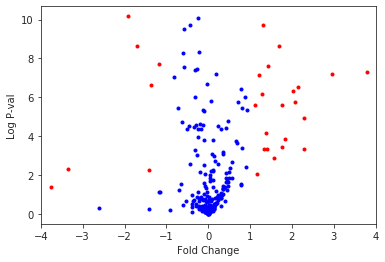

In [84]:
idx_fc = np.where(np.abs(log2fc) > 1)[0]
idx_pval = np.where(pval < 0.05)[0]

idx_keep = np.intersect1d(idx_fc, idx_pval)
idx_drop = np.setdiff1d(np.arange(len(pval)), idx_keep)

print(len(idx_keep))

plt.plot(log2fc[idx_drop], logp[idx_drop], 'b.')
plt.plot(log2fc[idx_keep], logp[idx_keep], 'r.')
plt.xlabel('Fold Change')
plt.ylabel('Log P-val')
plt.xlim([-4, 4])
plt.show()

In [44]:
for i, f in enumerate(df35.index):
    print(i, f)

# Look at features
# 157 - Start of Cyto
# 217 - Start of Whole Org

0 DN nbrhd, sox2 count
1 DN nbrhd, tbr1 count
2 DN nbrhd, dn count
3 SOX2 nbrhd, sox2 count
4 SOX2 nbrhd, tbr1 count
5 SOX2 nbrhd, dn count
6 TBR1 nbrhd, sox2 count
7 TBR1 nbrhd, tbr1 count
8 TBR1 nbrhd, dn count
9 DP nbrhd, sox2 count
10 DP nbrhd, tbr1 count
11 DP nbrhd, dn count
12 MidTBR1 nbrhd, sox2 count
13 MidTBR1 nbrhd, tbr1 count
14 MidTBR1 nbrhd, dn count
15 MidSOX2 nbrhd, sox2 count
16 MidSOX2 nbrhd, tbr1 count
17 MidSOX2 nbrhd, dn count
18 MidInter nbrhd, sox2 count
19 MidInter nbrhd, tbr1 count
20 MidInter nbrhd, dn count
21 DN nbrhd fraction
22 SOX2 nbrhd fraction
23 TBR1 nbrhd fraction
24 DP nbrhd fraction
25 MidTBR1 nbrhd fraction
26 MidSOX2 nbrhd fraction
27 MidInter nbrhd fraction
28 TBR1 / SOX2 ratio
29 MidTBR1 / MidSOX2 ratio
30 MidInter / DN ratio
31 DN nbrhd, eq diam mean
32 DN nbrhd, eq diam stdev
33 SOX2 nbrhd, eq diam mean
34 SOX2 nbrhd, eq diam stdev
35 TBR1 nbrhd, eq diam mean
36 TBR1 nbrhd, eq diam stdev
37 DP nbrhd, eq diam mean
38 DP nbrhd, eq diam stdev
39

In [99]:
hits = df.iloc[idx_keep].index
for h in hits:
    print(h)

DN nbrhd, dn count
SOX2 nbrhd, tbr1 count
SOX2 nbrhd, dn count
TBR1 nbrhd, sox2 count
TBR1 nbrhd, tbr1 count
TBR1 nbrhd, dn count
MidTBR1 nbrhd, tbr1 count
MidTBR1 nbrhd, dn count
MidSOX2 nbrhd, sox2 count
MidSOX2 nbrhd, dn count
MidInter nbrhd, sox2 count
MidInter nbrhd, tbr1 count
MidInter nbrhd, dn count
DN nbrhd fraction
SOX2 nbrhd fraction
DP nbrhd fraction
MidTBR1 nbrhd fraction
TBR1 / SOX2 ratio
MidInter / DN ratio
TBR1-LowDN cytoarchitecture fraction
TBR1-HighDN cytoarchitecture fraction
Surface cytoarchitecture fraction
DN cytoarchitecture fraction
Adjacent cytoarchitecture fraction
ave. Surface profile, dn count
ave. DN profile, tbr1 count
organoid volume (mm3)
ventricle volume mean (um3)
ventricle volume stdev (um3)


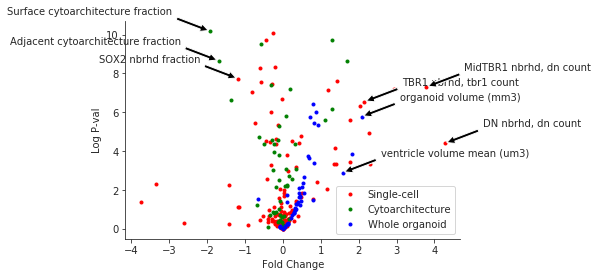

In [157]:
cyto_start = 157
wholeorg_start = 217

hits_show = [
    'DN nbrhd, dn count',
    'TBR1 nbrhd, tbr1 count',
    'MidTBR1 nbrhd, dn count',
#     'MidSOX2 nbrhd, dn count',
#     'MidInter nbrhd, dn count',
    'SOX2 nbrhd fraction',
    'Surface cytoarchitecture fraction',
    'Adjacent cytoarchitecture fraction',
    'organoid volume (mm3)',
    'ventricle volume mean (um3)',
]

sns.set_style('ticks')

singlecell_idx = np.arange(cyto_start)
cyto_idx = np.arange(cyto_start, wholeorg_start)
wholeorg_idx = np.arange(wholeorg_start, len(df35.index))

fig, ax = plt.subplots()

plt.plot(log2fc[singlecell_idx], logp[singlecell_idx], 'r.', label='Single-cell')
plt.plot(log2fc[cyto_idx], logp[cyto_idx], 'g.', label='Cytoarchitecture')
plt.plot(log2fc[wholeorg_idx], logp[wholeorg_idx], 'b.', label='Whole organoid')

for k, h in enumerate(hits_show):
    i = np.where(np.asarray([f == h for f in df.index]))[0][0]
    x = log2fc[i]
    y = logp[i]
    if x < 0:
        xytext = (x-1, y+1)
        halign = 'right'
    else:
        xytext = (x+1, y+1)
        halign = 'left'
    ax.annotate(h, xy=(x, y),  xycoords='data',
                xytext=xytext, textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=8, headlength=8),
                horizontalalignment=halign, verticalalignment='center',
                )

plt.xlabel('Fold Change')
plt.ylabel('Log P-val')
plt.legend()
# plt.xlim([-4, 4])
# plt.ylim([0, 7])
sns.despine()
plt.savefig(os.path.join(working_dir, 'volcano_d35_d60.pdf'), bbox_inches='tight')
plt.show()

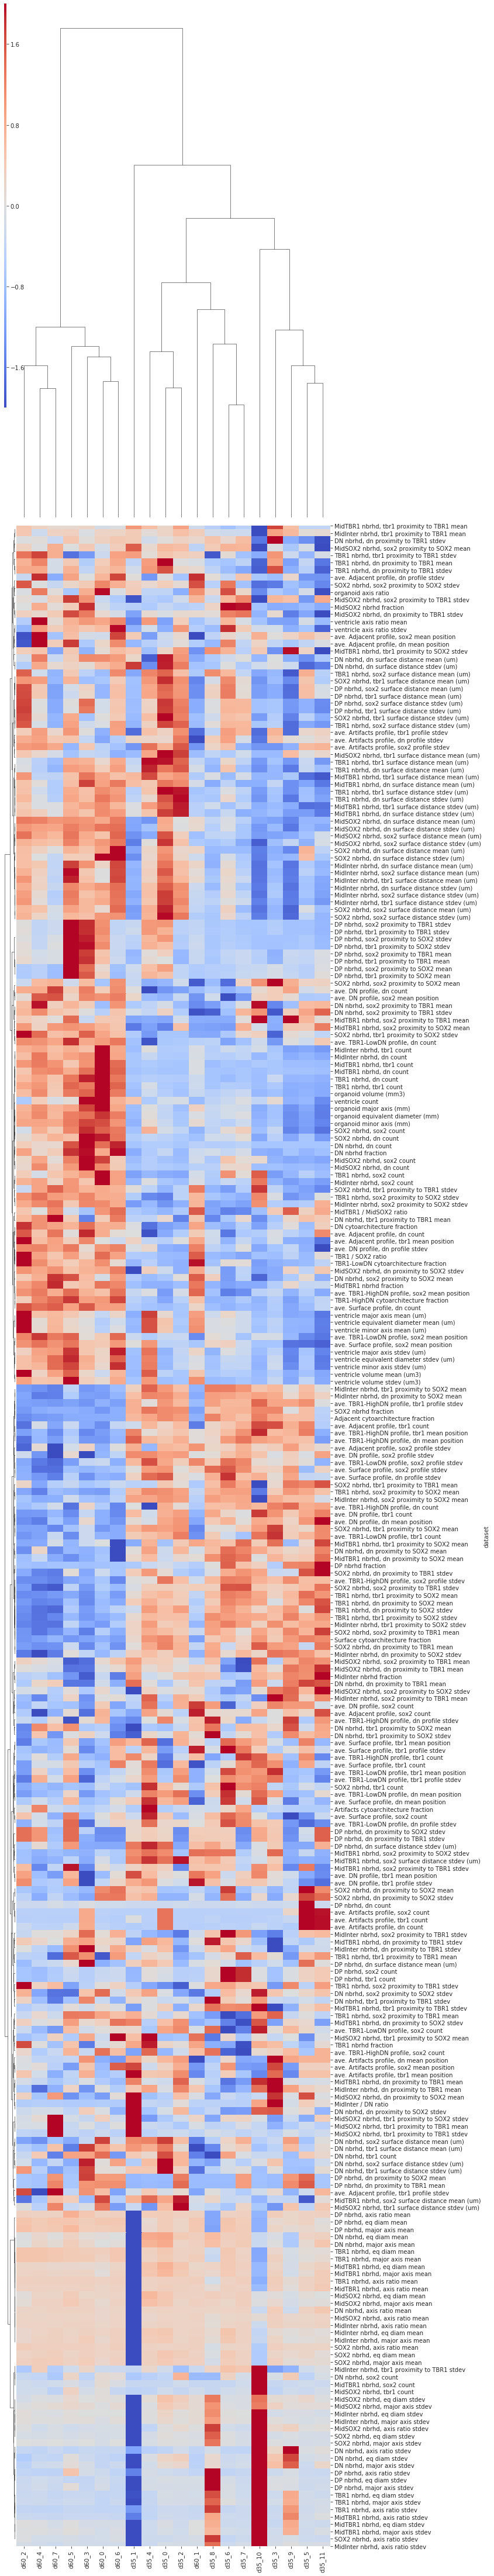

In [162]:
df_imputed = df.fillna(method='backfill')

sns.clustermap(data=df_imputed, 
               method='ward', 
               z_score=0, 
               cmap='coolwarm', 
               vmin=-2,
               vmax=2,
               figsize=(10, 80))
plt.savefig(os.path.join(working_dir, 'clustermap_d35_d60.pdf'), bbox_inches='tight')
plt.show()

Save dataframe with t-test results

In [163]:
# This will modify df

feature_scale = cyto_start * ['Single-cell'] + (wholeorg_start - cyto_start) * ['Cytoarchitecture'] + (len(df) - wholeorg_start) * ['Whole organoid']
df['scale'] = feature_scale

df['FC'] = fc
df['t'] = t
df['pval'] = pval
df['log2FC'] = log2fc
df['logp'] = logp

df.head()

,d35_0,d35_1,d35_2,d35_3,d35_4,d35_5,d35_6,d35_7,d35_8,d35_9,...,d60_4,d60_5,d60_6,d60_7,scale,FC,t,pval,log2FC,logp
dataset,,,,,,,,,,,,,,,,,,,,,
"DN nbrhd, sox2 count",14.0,9.0,34.0,19.0,12.0,13.0,26.0,18.0,5.0,28.0,...,14.0,25.0,22.0,9.0,Single-cell,0.653979,0.989306,0.335627,-0.612683,0.474144
"DN nbrhd, tbr1 count",15.0,10.0,11.0,7.0,9.0,10.0,12.0,8.0,0.0,5.0,...,10.0,12.0,3.0,2.0,Single-cell,0.902913,0.430055,0.672260,-0.147342,0.172463
"DN nbrhd, dn count",84735.0,3836.0,21985.0,5449.0,80307.0,9378.0,110050.0,158549.0,105539.0,15146.0,...,545173.0,1383294.0,1560760.0,521993.0,Single-cell,19.423232,-5.404193,0.000039,4.279711,4.408488
"SOX2 nbrhd, sox2 count",550868.0,362686.0,471401.0,494048.0,833321.0,218660.0,634230.0,707343.0,462029.0,134363.0,...,836021.0,969815.0,997507.0,718123.0,Single-cell,1.866447,-3.317497,0.003830,0.900295,2.416753
"SOX2 nbrhd, tbr1 count",1296.0,435.0,1003.0,672.0,2094.0,838.0,2572.0,1652.0,1256.0,498.0,...,418.0,455.0,550.0,330.0,Single-cell,0.373548,3.159654,0.005422,-1.420636,2.265818


In [48]:
df.to_excel(os.path.join(working_dir, 'd35_vs_d60_withFC.xlsx'))

Make swarm plots

In [164]:
kept_feats = df35.index[idx_keep]
for f, a, b in zip(kept_feats, d35_means[idx_keep], d60_means[idx_keep]):
    if b > a:
        direction = 1
    else:
        direction = -1
    print(f'{f:60s} {a:12.3f} -> {b:12.3f} {direction:4d}')

DN nbrhd, dn count                                              51027.333 ->   991115.750    1
SOX2 nbrhd, tbr1 count                                           1226.417 ->      458.125   -1
SOX2 nbrhd, dn count                                              222.583 ->      584.750    1
TBR1 nbrhd, sox2 count                                            805.833 ->     1819.500    1
TBR1 nbrhd, tbr1 count                                         153405.750 ->   681618.375    1
TBR1 nbrhd, dn count                                              379.750 ->     1553.000    1
MidTBR1 nbrhd, tbr1 count                                        5160.083 ->    39762.125    1
MidTBR1 nbrhd, dn count                                         85714.917 ->  1184473.750    1
MidSOX2 nbrhd, sox2 count                                        4109.750 ->    13930.375    1
MidSOX2 nbrhd, dn count                                        126573.083 ->   618220.125    1
MidInter nbrhd, sox2 count                        

In [165]:
d35_hits = df35.loc[kept_feats].T
d60_hits = df60.loc[kept_feats].T

In [166]:
d35_hits['age'] = 'd35'
d60_hits['age'] = 'd60'

df_hits = d35_hits.append(d60_hits)
df_hits['analysis'] = 'organoids'

df_hits

dataset,"DN nbrhd, dn count","SOX2 nbrhd, tbr1 count","SOX2 nbrhd, dn count","TBR1 nbrhd, sox2 count","TBR1 nbrhd, tbr1 count","TBR1 nbrhd, dn count","MidTBR1 nbrhd, tbr1 count","MidTBR1 nbrhd, dn count","MidSOX2 nbrhd, sox2 count","MidSOX2 nbrhd, dn count",...,Surface cytoarchitecture fraction,DN cytoarchitecture fraction,Adjacent cytoarchitecture fraction,"ave. Surface profile, dn count","ave. DN profile, tbr1 count",organoid volume (mm3),ventricle volume mean (um3),ventricle volume stdev (um3),age,analysis
d35_0,84735.0,1296.0,250.0,284.0,185677.0,463.0,5860.0,86268.0,3056.0,112005.0,...,0.312562,0.067120,0.480189,40.139965,82.165350,3.153118,5.781529e+05,7.817244e+05,d35,organoids
d35_1,3836.0,435.0,225.0,162.0,147249.0,437.0,5969.0,77438.0,2404.0,73468.0,...,0.209385,0.176970,0.405502,47.217303,78.268285,1.856333,2.834387e+05,9.307108e+05,d35,organoids
d35_2,21985.0,1003.0,215.0,240.0,155673.0,456.0,5392.0,90704.0,2395.0,86723.0,...,0.258409,0.081702,0.456252,45.126753,87.575224,2.280411,3.998595e+05,9.637871e+05,d35,organoids
d35_3,5449.0,672.0,246.0,128.0,172099.0,659.0,5839.0,120148.0,1544.0,57748.0,...,0.232685,0.131724,0.438371,47.702036,90.576737,2.145203,5.257111e+05,1.689363e+06,d35,organoids
d35_4,80307.0,2094.0,275.0,424.0,328248.0,497.0,7467.0,124962.0,4327.0,134438.0,...,0.300244,0.022474,0.437971,42.761489,55.531212,4.668154,2.072354e+06,4.300374e+06,d35,organoids
d35_5,9378.0,838.0,195.0,771.0,73685.0,251.0,3582.0,72298.0,1239.0,36628.0,...,0.318026,0.103523,0.394308,39.927862,83.944873,1.262718,3.459693e+05,1.589399e+06,d35,organoids
d35_6,110050.0,2572.0,314.0,2175.0,198504.0,290.0,6159.0,85052.0,11549.0,383921.0,...,0.259827,0.088785,0.419455,35.538019,67.564918,3.892499,5.193233e+05,7.462953e+05,d35,organoids
d35_7,158549.0,1652.0,391.0,1289.0,187838.0,389.0,4829.0,114423.0,8630.0,391109.0,...,0.217278,0.131714,0.386777,40.058383,60.220000,4.375134,4.833794e+05,9.927089e+05,d35,organoids
d35_8,105539.0,1256.0,319.0,719.0,155590.0,374.0,3462.0,94278.0,3834.0,155395.0,...,0.235081,0.103511,0.492268,40.961290,85.127090,3.299144,4.200899e+05,6.655185e+05,d35,organoids
d35_9,15146.0,498.0,91.0,411.0,60325.0,247.0,3448.0,75557.0,640.0,24022.0,...,0.294715,0.185652,0.391320,30.901767,73.034653,0.881899,1.385929e+05,2.041546e+05,d35,organoids


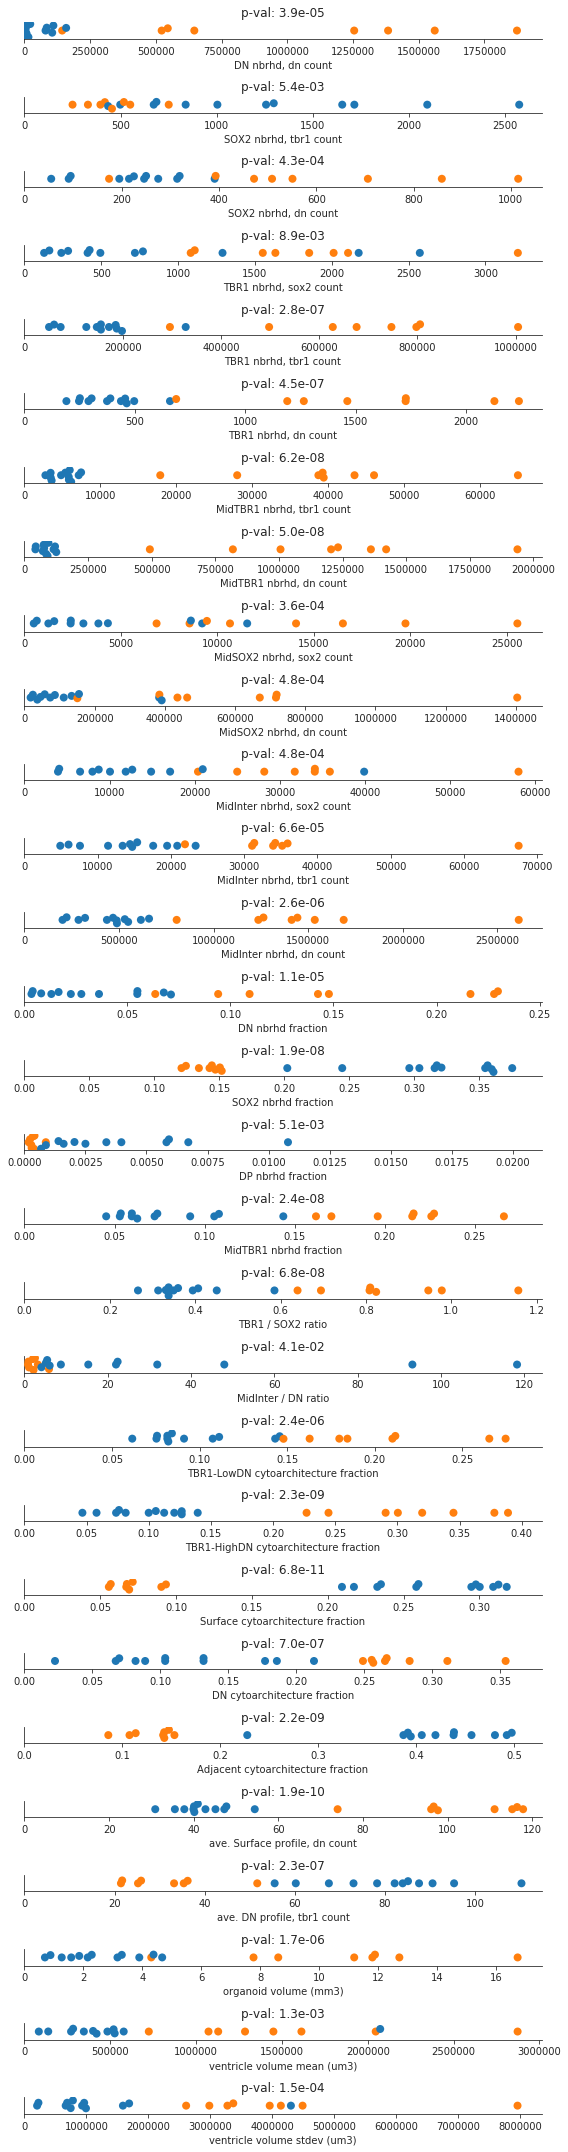

In [167]:
fig = plt.figure(figsize=(8, 30))

for i, f in enumerate(kept_feats):
    plt.subplot(len(kept_feats), 1, i+1)
    plt.title('p-val: {:.1e}'.format(df['pval'][f]))
    ax = sns.swarmplot(x=f, y='analysis', hue='age', data=df_hits, s=8, figure=fig)
    plt.legend().remove()
    xlim = ax.get_xlim()
    ax.get_yaxis().set_visible(False)
    plt.xlim([0, xlim[1]])
    sns.despine()

fig.tight_layout()
plt.show()

In [168]:
df_hits.drop(columns=['age', 'analysis']).to_numpy().shape

(20, 29)

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


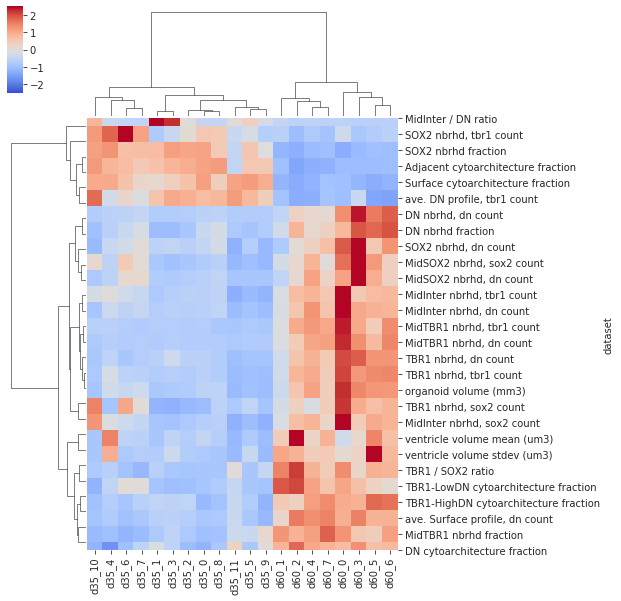

In [190]:
sns.clustermap(data=df_hits.drop(columns=['age', 'analysis']).T.drop(['DP nbrhd fraction']), 
               method='ward', 
               z_score=0, 
               cmap='coolwarm', 
               vmin=-2.5,
               vmax=2.5,
               figsize=(7, 10))

plt.tight_layout()
plt.savefig(os.path.join(working_dir, 'clustermap_d35_d60_hits.pdf'), bbox_inches='tight')
plt.show()

Radar plots

Cytoarchitecutre proportions

In [55]:
[print(f) for f in df.index]

DN nbrhd, sox2 count
DN nbrhd, tbr1 count
DN nbrhd, dn count
SOX2 nbrhd, sox2 count
SOX2 nbrhd, tbr1 count
SOX2 nbrhd, dn count
TBR1 nbrhd, sox2 count
TBR1 nbrhd, tbr1 count
TBR1 nbrhd, dn count
DP nbrhd, sox2 count
DP nbrhd, tbr1 count
DP nbrhd, dn count
MidTBR1 nbrhd, sox2 count
MidTBR1 nbrhd, tbr1 count
MidTBR1 nbrhd, dn count
MidSOX2 nbrhd, sox2 count
MidSOX2 nbrhd, tbr1 count
MidSOX2 nbrhd, dn count
MidInter nbrhd, sox2 count
MidInter nbrhd, tbr1 count
MidInter nbrhd, dn count
DN nbrhd fraction
SOX2 nbrhd fraction
TBR1 nbrhd fraction
DP nbrhd fraction
MidTBR1 nbrhd fraction
MidSOX2 nbrhd fraction
MidInter nbrhd fraction
TBR1 / SOX2 ratio
MidTBR1 / MidSOX2 ratio
MidInter / DN ratio
DN nbrhd, eq diam mean
DN nbrhd, eq diam stdev
SOX2 nbrhd, eq diam mean
SOX2 nbrhd, eq diam stdev
TBR1 nbrhd, eq diam mean
TBR1 nbrhd, eq diam stdev
DP nbrhd, eq diam mean
DP nbrhd, eq diam stdev
MidTBR1 nbrhd, eq diam mean
MidTBR1 nbrhd, eq diam stdev
MidSOX2 nbrhd, eq diam mean
MidSOX2 nbrhd, eq diam s

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [56]:
from scout import utils 

In [57]:
cyto_names = utils.read_csv('/data/datasets/organoid_phenotyping/analysis/d35_vs_d60/Lancaster_d35/20190419_14_35_07_AA_org1_488LP13_561LP120_642LP60/cyto_names.csv')
cyto_names

['TBR1-LowDN', 'TBR1-HighDN', 'Surface', 'Artifacts', 'DN', 'Adjacent']

In [60]:
cyto_features = [f'{n} cytoarchitecture fraction' for n in cyto_names]

d35_cyto = df35.loc[cyto_features].mean(axis=1)
d60_cyto = df60.loc[cyto_features].mean(axis=1)

df_cyto = pd.DataFrame({'d35': d35_cyto,
                        'd60': d60_cyto})
df_cyto = df_cyto.drop('Artifacts cytoarchitecture fraction')
df_cyto

,d35,d60
dataset,,
TBR1-LowDN cytoarchitecture fraction,0.095076,0.204636
TBR1-HighDN cytoarchitecture fraction,0.097221,0.311797
Surface cytoarchitecture fraction,0.270417,0.071415
DN cytoarchitecture fraction,0.114652,0.280088
Adjacent cytoarchitecture fraction,0.418926,0.129223


['TBR1-LowDN', 'TBR1-HighDN', 'Surface', 'DN', 'Adjacent']


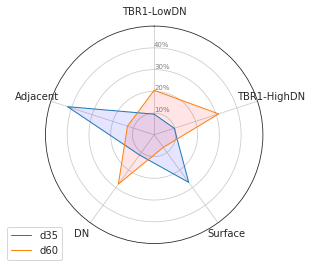

In [64]:
# number of variable
categories = list(df_cyto.index)
categories = [c.split()[0] for c in categories]
print(categories)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.10, 0.20, 0.30, 0.40], ["10%", "20%", "30%", "40%"], color="grey", size=7)
plt.ylim(0, 0.5)

# Ind1
values = list(df_cyto['d35'].values)
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="d35")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values = list(df_cyto['d60'].values)
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="d60")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

Feature heatmap / clustermap

# Feature correlations

In [65]:
from itertools import product
from scipy.stats import pearsonr

In [66]:
features = list(df35.index)
combinations = list(product(features, features))

len(combinations), len(features) ** 2

(75625, 75625)

In [74]:
corr = []
R = np.zeros((len(features), len(features)))
P = np.zeros((len(features), len(features)))
for combination in tqdm(combinations, total=len(combinations)):
    feat1 = combination[0]
    feat2 = combination[1]
    i = features.index(feat1)
    j = features.index(feat2)
    a = df_imputed.loc[feat1]
    b = df_imputed.loc[feat2]
    # remove nans
    keep = np.logical_and(~np.isnan(a), ~np.isnan(b))
    a = a[keep]
    b = b[keep]
    r, p = pearsonr(a, b)
#     if np.isclose(r, 1.0):
#         print(feat1 == feat2)
    corr.append(r)
    R[i, j] = r
    P[i, j] = p
corr = np.asarray(corr)

In [75]:
df_r = pd.DataFrame(R, index=features, columns=features)
df_r.head()

,"DN nbrhd, sox2 count","DN nbrhd, tbr1 count","DN nbrhd, dn count","SOX2 nbrhd, sox2 count","SOX2 nbrhd, tbr1 count","SOX2 nbrhd, dn count","TBR1 nbrhd, sox2 count","TBR1 nbrhd, tbr1 count","TBR1 nbrhd, dn count","DP nbrhd, sox2 count",...,"MidSOX2 nbrhd, tbr1 surface distance mean (um)","MidSOX2 nbrhd, tbr1 surface distance stdev (um)","MidSOX2 nbrhd, dn surface distance mean (um)","MidSOX2 nbrhd, dn surface distance stdev (um)","MidInter nbrhd, sox2 surface distance mean (um)","MidInter nbrhd, sox2 surface distance stdev (um)","MidInter nbrhd, tbr1 surface distance mean (um)","MidInter nbrhd, tbr1 surface distance stdev (um)","MidInter nbrhd, dn surface distance mean (um)","MidInter nbrhd, dn surface distance stdev (um)"
"DN nbrhd, sox2 count",1.000000,0.102542,-0.102783,-0.136553,0.318612,-0.228821,0.382548,-0.142957,-0.151914,0.098714,...,-0.111120,0.019152,-0.235859,-0.261345,-0.278859,-0.255011,-0.278211,-0.232070,-0.289201,-0.241628
"DN nbrhd, tbr1 count",0.102542,1.000000,0.155645,0.280561,0.192567,0.185032,0.111267,0.167244,0.178811,0.155862,...,0.385660,0.215467,0.123304,0.194615,0.332909,0.409108,0.284661,0.397950,0.357280,0.440289
"DN nbrhd, dn count",-0.102783,0.155645,1.000000,0.821541,-0.410267,0.909652,0.642267,0.901856,0.935608,-0.233275,...,-0.279032,-0.045749,0.730744,0.788272,0.580107,0.545349,0.603221,0.561590,0.671145,0.609211
"SOX2 nbrhd, sox2 count",-0.136553,0.280561,0.821541,1.000000,-0.026800,0.900103,0.576335,0.850832,0.834628,-0.053811,...,-0.134642,-0.088532,0.667980,0.765831,0.620064,0.660934,0.644016,0.675246,0.697041,0.711077
"SOX2 nbrhd, tbr1 count",0.318612,0.192567,-0.410267,-0.026800,1.000000,-0.280403,0.068600,-0.397289,-0.495474,0.769184,...,0.134108,-0.196521,-0.388178,-0.343554,-0.093061,-0.016613,-0.113122,-0.029133,-0.153643,-0.077342


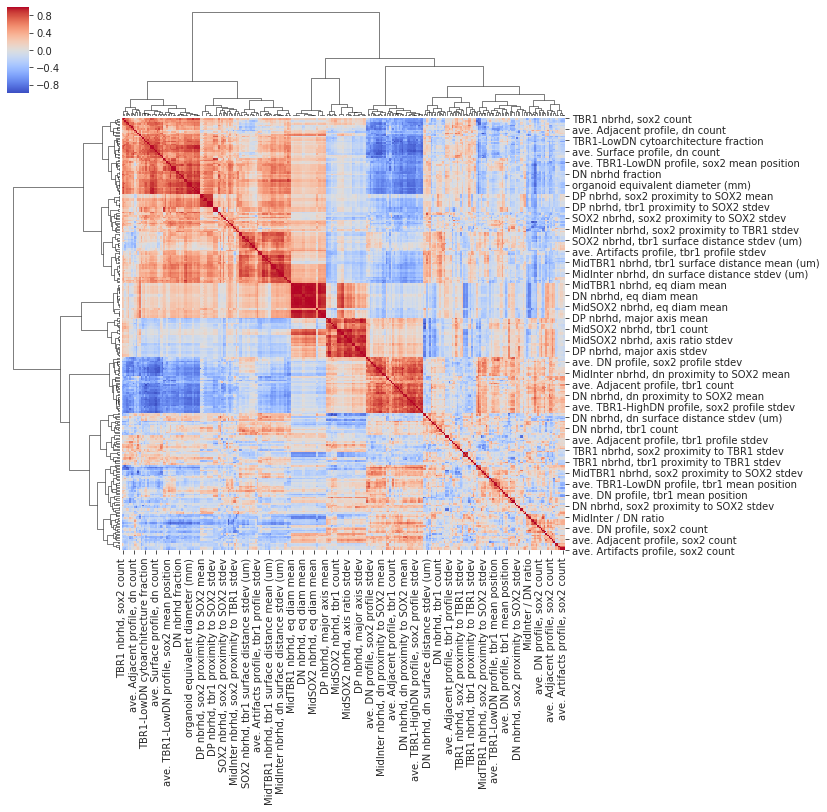

In [77]:
%matplotlib inline
cg = sns.clustermap(df_r, 
                    method='ward', 
                    metric='euclidean',
                    cmap='coolwarm')
plt.show()

In [45]:
for idx in cg.dendrogram_row.reordered_ind:
    print(features[idx])

ave. Maturing profile, tbr1 mean position
MidInter nbrhd fraction
DN nbrhd, dn proximity to SOX2 mean
ave. Mature profile, tbr1 mean position
ave. Surface profile, tbr1 count
ave. Maturing profile, tbr1 count
MidSOX2 nbrhd, sox2 proximity to SOX2 mean
DP nbrhd, sox2 proximity to SOX2 mean
DP nbrhd, tbr1 proximity to SOX2 mean
SOX2 nbrhd, tbr1 proximity to SOX2 mean
TBR1 nbrhd, sox2 proximity to TBR1 mean
MidInter nbrhd, dn proximity to SOX2 stdev
SOX2 nbrhd, dn proximity to TBR1 mean
SOX2 nbrhd, sox2 proximity to TBR1 mean
ave. Mature profile, tbr1 profile stdev
TBR1 nbrhd, sox2 proximity to SOX2 mean
MidInter nbrhd, sox2 proximity to SOX2 mean
TBR1 nbrhd, dn proximity to SOX2 mean
TBR1 nbrhd, tbr1 proximity to SOX2 stdev
MidInter nbrhd, dn proximity to SOX2 mean
MidTBR1 nbrhd, dn proximity to SOX2 mean
TBR1 nbrhd, tbr1 proximity to SOX2 mean
Interfering cytoarchitecture fraction
SOX2 nbrhd fraction
MidInter nbrhd, tbr1 proximity to SOX2 mean
DP nbrhd fraction
ave. Interfering profile,

In [46]:
from scipy.cluster.hierarchy import dendrogram

In [48]:
%matplotlib inline

KeyError: 'scale'

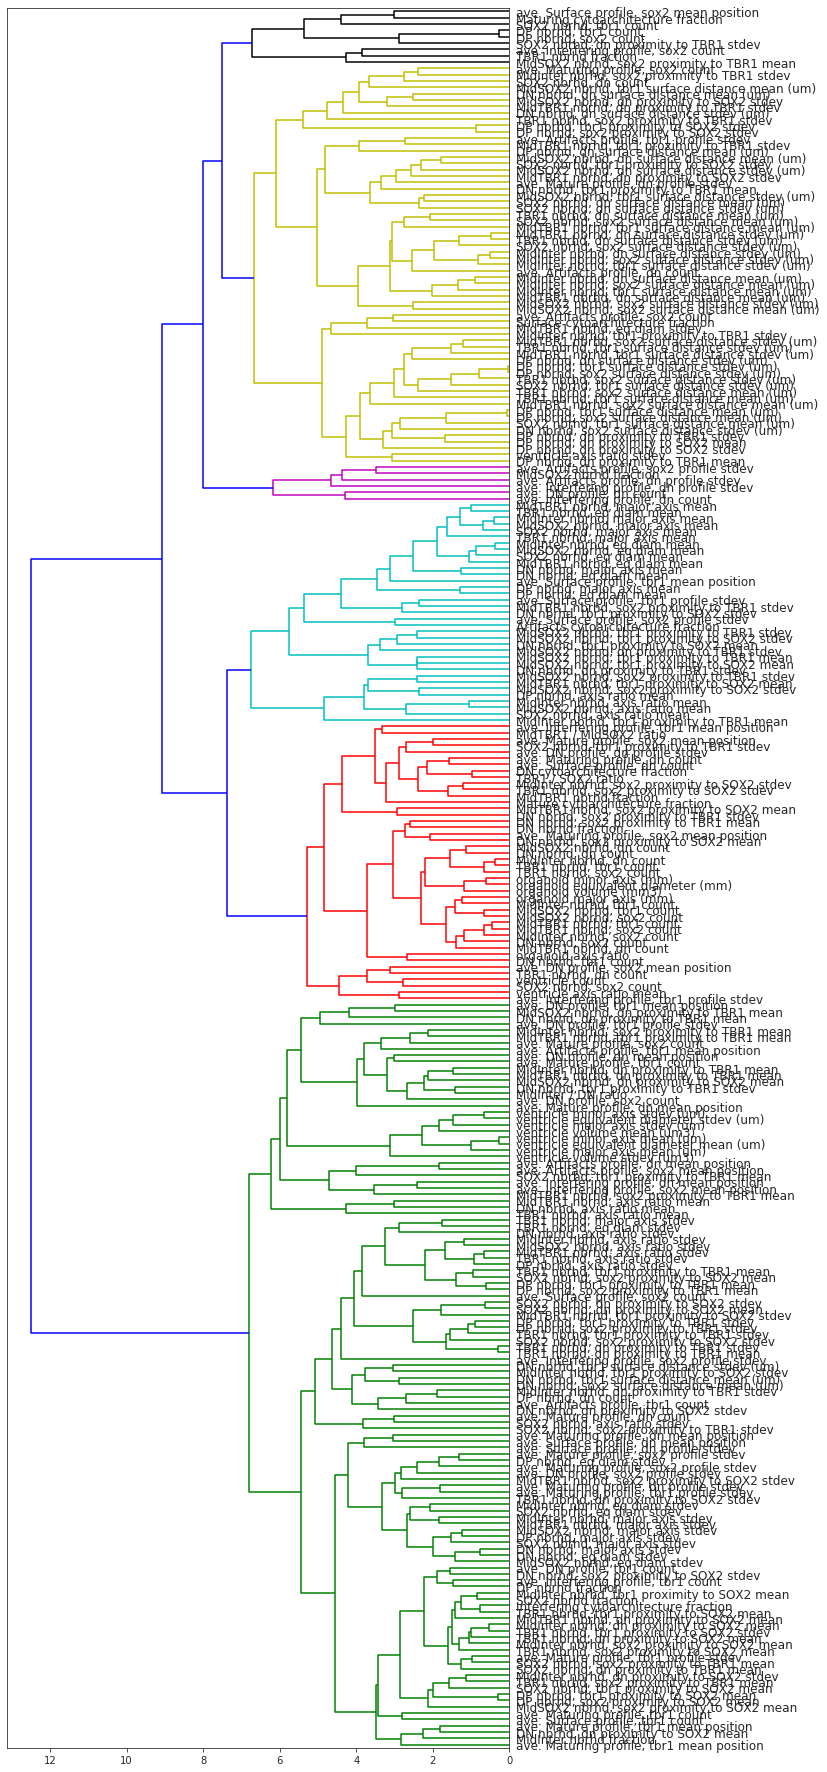

In [49]:
plt.figure(figsize=(9, 32))
ddata = dendrogram(cg.dendrogram_row.linkage,
                   color_threshold=7,
                   labels=features,
                   orientation='left',
                   leaf_font_size=12)

label_colors = {'Single-cell': 'b', 'Cytoarchitecture': 'r', 'Whole organoid': 'g'}
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    scale = df.loc[lbl.get_text()]['scale']
    lbl.set_color(label_colors[scale])
    
plt.tight_layout()
plt.show()

Negatively Correlated r < -0.99: 2
-0.9918424502663341
	 TBR1 nbrhd, sox2 proximity to SOX2 mean
	 TBR1 nbrhd, sox2 proximity to SOX2 stdev
-0.9918424502663341
	 TBR1 nbrhd, sox2 proximity to SOX2 stdev
	 TBR1 nbrhd, sox2 proximity to SOX2 mean
Positively Correlated r > 0.99: 44
0.9999883307140732
	 DP nbrhd, tbr1 surface distance stdev (um)
	 DP nbrhd, sox2 surface distance stdev (um)
0.9999883307140732
	 DP nbrhd, sox2 surface distance stdev (um)
	 DP nbrhd, tbr1 surface distance stdev (um)
0.9999091216905459
	 DP nbrhd, sox2 surface distance mean (um)
	 DP nbrhd, tbr1 surface distance mean (um)
0.9999091216905459
	 DP nbrhd, tbr1 surface distance mean (um)
	 DP nbrhd, sox2 surface distance mean (um)
0.9995569728732345
	 DP nbrhd, tbr1 count
	 DP nbrhd, sox2 count
0.9995569728732345
	 DP nbrhd, sox2 count
	 DP nbrhd, tbr1 count
0.9988579480589957
	 DP nbrhd, sox2 proximity to SOX2 mean
	 DP nbrhd, tbr1 proximity to SOX2 mean
0.9988579480589957
	 DP nbrhd, tbr1 proximity to SOX2 mean


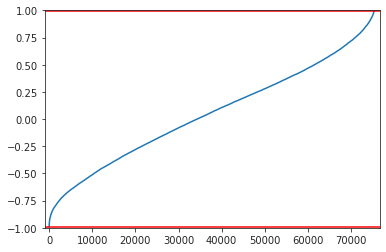

In [50]:
cutoff = 0.99

idx = np.argsort(corr)
comb_sorted = np.asarray(combinations)[idx]
corr_sorted = corr[idx]

# Remove combinations that are on the diagonal
keep_idx = np.asarray([i for i, (f1, f2) in enumerate(comb_sorted) if f1 != f2])
comb_sorted = comb_sorted[keep_idx]
corr_sorted = corr_sorted[keep_idx]

neg_idx = np.where(corr_sorted <= -cutoff)[0]
pos_idx = np.where(corr_sorted >= cutoff)[0]

neg_corr = corr_sorted[neg_idx]
neg_comb = comb_sorted[neg_idx]

pos_corr = corr_sorted[pos_idx[::-1]]
pos_comb = comb_sorted[pos_idx[::-1]]

print('Negatively Correlated r < -0.99:', len(neg_idx))
for n, c in zip(neg_corr, neg_comb):
    print(n)
    print("\t", c[0])
    print("\t", c[1])
    
print('Positively Correlated r > 0.99:', len(pos_idx))
for p, c in zip(pos_corr, pos_comb):
    print(p)
    print("\t", c[0])
    print("\t", c[1])

plt.plot(corr_sorted)
plt.plot([-1e4, len(corr) + 1e4], [cutoff, cutoff], 'r-')
plt.plot([-1e4, len(corr) + 1e4], [-cutoff, -cutoff], 'r-')
plt.ylim([-1, 1])
plt.xlim([-1e3, len(corr) + 1e3])
plt.show()

Look at correlations between features in two specific length scales

In [ ]:
features1 = features[:cyto_start]
features2 = features[cyto_start:wholeorg_start]

combinations = list(product(features1, features2))
len(combinations)

In [ ]:
R = np.zeros((len(features1), len(features2)))
P = np.zeros((len(features1), len(features2)))
for combination in tqdm(combinations, total=len(combinations)):
    feat1 = combination[0]
    feat2 = combination[1]
    i = features1.index(feat1)
    j = features2.index(feat2)
    a = df.loc[feat1]
    b = df.loc[feat2]
    # remove nans
    keep = np.logical_and(~np.isnan(a), ~np.isnan(b))
    a = a[keep]
    b = b[keep]
    r, p = pearsonr(a, b)
    R[i, j] = r
    P[i, j] = p

In [ ]:
%matplotlib inline

df_r = pd.DataFrame(R, index=features1, columns=features2)

cg = sns.clustermap(df_r, 
                    method='average', 
                    metric='euclidean',
                    cmap='coolwarm',
                    figsize=(24, 24))
plt.tight_layout()
plt.show()